## **Part 1 ‐ Exploratory data analysis**

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­ minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
df = pd.read_json("/Users/angelique/Documents/GitHub/ultimate_challenge/logins.json")
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [11]:
df.dtypes

login_time    datetime64[ns]
dtype: object

In [15]:
# Round down to the nearest 15-minute interval
df['time_interval'] = df['login_time'].dt.floor('15T')

# Count logins per 15-minute interval
login_counts = df.groupby('time_interval').size().reset_index(name='login_count')

# Display result
print(login_counts.head())

        time_interval  login_count
0 1970-01-01 20:00:00            2
1 1970-01-01 20:15:00            6
2 1970-01-01 20:30:00            9
3 1970-01-01 20:45:00            7
4 1970-01-01 21:00:00            1


In [23]:
login_counts['Weekday'] = login_counts['time_interval'].dt.day_name()
login_counts['Hour'] = login_counts['time_interval'].dt.hour

login_counts.head()

,time_interval,login_count,Weekday,Hour
0,1970-01-01 20:00:00,2,Thursday,20
1,1970-01-01 20:15:00,6,Thursday,20
2,1970-01-01 20:30:00,9,Thursday,20
3,1970-01-01 20:45:00,7,Thursday,20
4,1970-01-01 21:00:00,1,Thursday,21


In [25]:
login_counts.columns

Index(['time_interval', 'login_count', 'Weekday', 'Hour'], dtype='object')

In [33]:
# Calculate the average login count by weekday
average_logins_by_day = login_counts.groupby('Weekday')['login_count'].mean().reset_index()
average_logins_by_day = average_logins_by_day.sort_values(by=['login_count'])
# Display result
print(average_logins_by_day)

     Weekday  login_count
1     Monday     6.535556
5    Tuesday     7.396648
6  Wednesday     8.102665
4   Thursday     9.336456
0     Friday    10.893983
3     Sunday    12.811707
2   Saturday    13.771855


Based on this data coming from a transportation company the weekends have the highest counts and weekdays have the lowest counts. Let's take a look at the hours that are busiest.

In [36]:
# Calculate the average login count by weekday
average_logins_by_hour = login_counts.groupby('Hour')['login_count'].mean().reset_index()
average_logins_by_hour = average_logins_by_hour.sort_values(by=['login_count'], ascending=False)
# Display result
print(average_logins_by_hour.head(10))

    Hour  login_count
22    22    16.233415
1      1    15.482843
23    23    14.848039
0      0    14.688725
2      2    14.356436
11    11    14.283251
21    21    13.815725
4      4    12.744304
12    12    12.166667
3      3    12.017413


In [38]:
# Create a new column 'hour_category' to classify hours
login_counts['hour_category'] = login_counts['Hour'].apply(lambda x: 'Work Hours' if 6 <= x < 18 else 'After Hours')

# Display first few rows to verify
print(login_counts.head())

        time_interval  login_count   Weekday  Hour hour_category
0 1970-01-01 20:00:00            2  Thursday    20   After Hours
1 1970-01-01 20:15:00            6  Thursday    20   After Hours
2 1970-01-01 20:30:00            9  Thursday    20   After Hours
3 1970-01-01 20:45:00            7  Thursday    20   After Hours
4 1970-01-01 21:00:00            1  Thursday    21   After Hours


In [48]:
# Aggregate by sum
df_total = login_counts.groupby(["Weekday", "hour_category"], as_index=False).sum(numeric_only=True)[["Weekday", "hour_category", "login_count"]]

# Aggregate by mean
df_total["total_avg"] = login_counts.groupby(["Weekday", "hour_category"])["login_count"].mean().values

# Display the result
print(df_total)

      Weekday hour_category  login_count  total_avg
0      Friday   After Hours         9864  13.815126
1      Friday    Work Hours         5344   7.835777
2      Monday   After Hours         4473   6.607090
3      Monday    Work Hours         4350   6.463596
4    Saturday   After Hours        13876  19.272222
5    Saturday    Work Hours         5501   8.007278
6      Sunday   After Hours        12508  17.444909
7      Sunday    Work Hours         5659   8.072753
8    Thursday   After Hours         7341  10.940387
9    Thursday    Work Hours         4619   7.572131
10    Tuesday   After Hours         5305   8.199382
11    Tuesday    Work Hours         3963   6.539604
12  Wednesday   After Hours         6159   9.388720
13  Wednesday    Work Hours         4180   6.741935


Based on this we can see that weekdays have similar login's during the workday but even after hours on workdays have higher logins.  Saturday and Sunday evenings seem to have particularly

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


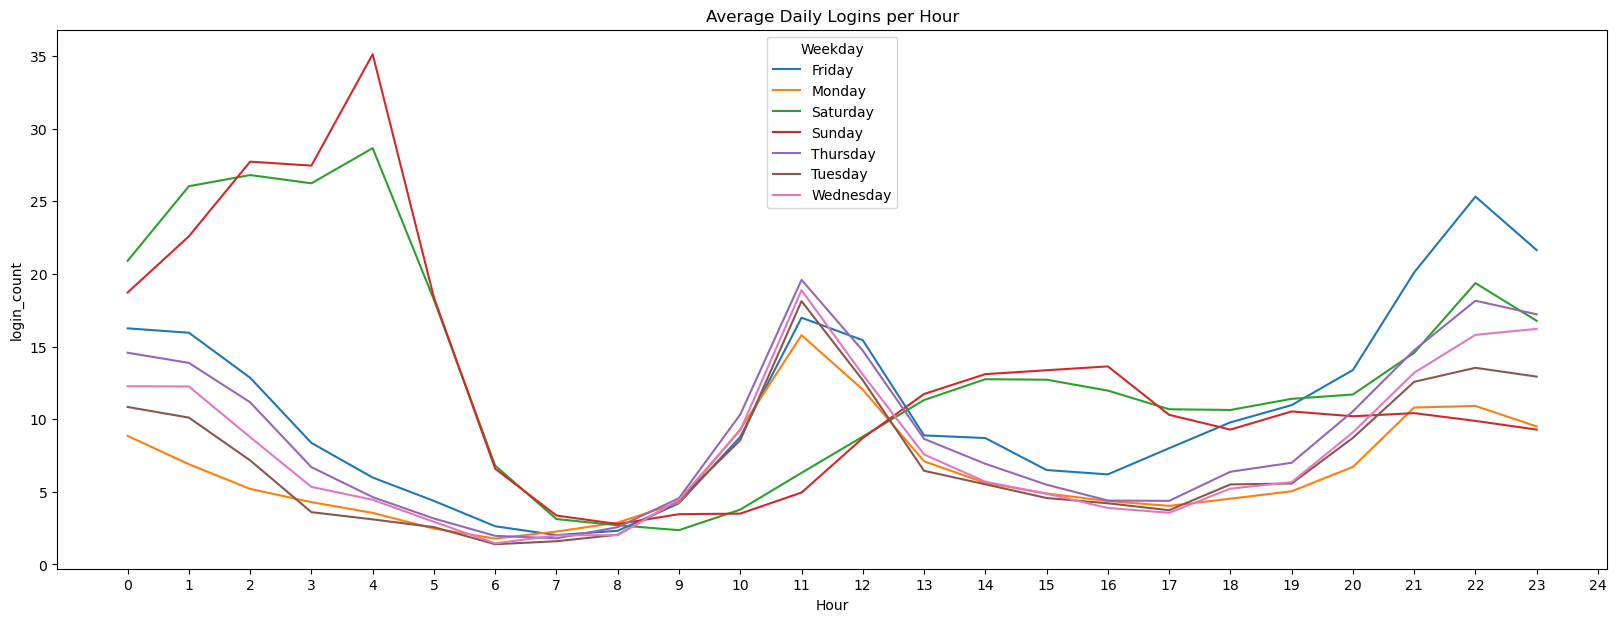

In [54]:
#getting average daily logins per hour
df_hourly = login_counts.groupby(["Weekday", "Hour"])['login_count'].mean().reset_index()

#plotting df
f, axes = plt.subplots(figsize=(20,7))
ax = sns.lineplot(x="Hour", y="login_count", data=df_hourly, hue="Weekday")
ax.set(title="Average Daily Logins per Hour")
plt.xticks(range(0,25))

#display plot
plt.show()

The graph shows notable peaks in login activity around midnight on weekends, with particularly high spikes at 4 AM on Saturdays and Sundays. This likely reflects people staying out late on Friday and Saturday nights, with activity extending into the early morning hours.

During weekday mornings, there's a gradual increase in logins starting around 10 AM, peaking at 11 AM, and tapering off by 1 PM. This pattern suggests activity during morning breaks and lunch hours, when people might check their phones or log in for personal use.

On Friday evenings, logins start increasing around 4 PM and continue to rise until 11 PM. This aligns with end-of-week socializing, company happy hours, and other social events. Similarly, on Saturdays, activity picks up around noon and remains elevated, likely reflecting a mix of brunch outings, shopping, and weekend leisure activities.

Overall, the trends suggest a strong correlation between work schedules, social habits, and leisure time, with distinct differences between weekdays and weekends.

In [56]:
login_counts['Week'] = login_counts['time_interval'].dt.isocalendar().week
login_counts['Month'] = login_counts['time_interval'].dt.month
login_counts['Week_Since_Start'] = (login_counts['time_interval'] - login_counts['time_interval'].min()).dt.days // 7
login_counts.head()

,time_interval,login_count,Weekday,Hour,hour_category,Week,Month,Week_Since_Start
0,1970-01-01 20:00:00,2,Thursday,20,After Hours,1,1,0
1,1970-01-01 20:15:00,6,Thursday,20,After Hours,1,1,0
2,1970-01-01 20:30:00,9,Thursday,20,After Hours,1,1,0
3,1970-01-01 20:45:00,7,Thursday,20,After Hours,1,1,0
4,1970-01-01 21:00:00,1,Thursday,21,After Hours,1,1,0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


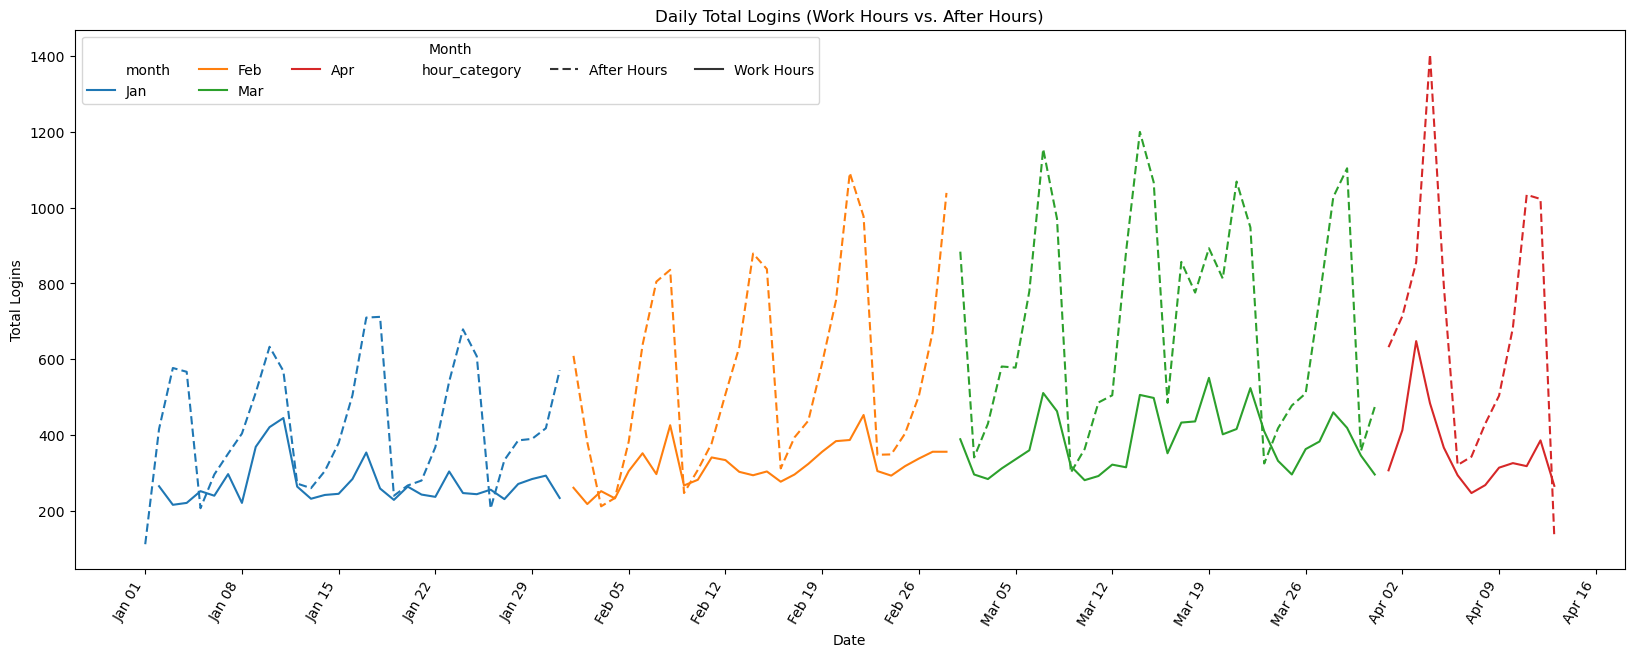

In [68]:
import matplotlib.dates as mdates

# Extracting the date
login_counts["date"] = login_counts["time_interval"].dt.date

# Grouping by 'date' and 'hour_category' to sum login counts
df_daily = login_counts.groupby(["date", "hour_category"])["login_count"].sum().reset_index()

# Renaming columns for clarity
df_daily.rename(columns={"login_count": "daily"}, inplace=True)

# Converting 'date' to datetime for plotting
df_daily["date"] = pd.to_datetime(df_daily["date"])

# Extracting months and mapping them to names
month_map = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
             7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
df_daily["month"] = df_daily["date"].dt.month.map(month_map)

# Plotting
f, axes = plt.subplots(figsize=(20, 7))
ax = sns.lineplot(x="date", y="daily", hue="month", style="hour_category", 
                  data=df_daily, palette="tab10", dashes={"Work Hours": "", "After Hours": (4, 2)})

# Formatting the plot
ax.legend(title="Month", loc="upper left", ncol=6)
ax.set(title="Daily Total Logins (Work Hours vs. After Hours)", xlabel="Date", ylabel="Total Logins")

# Formatting x-axis with proper date intervals
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Properly format dates

# Display plot
plt.xticks(rotation=60, ha="right")  # Rotating labels properly
plt.show()

The graph shows consistent peaks every weekend and during After Work hours, indicating predictable surges in login activity. Overall, there is a noticeable month-over-month increase, which could be attributed to seasonal factors like changing weather.

A particularly high spike in weekend activity appears between February 12th and February 19th, which may be linked to late Valentine’s Day celebrations. Additionally, an unusual pattern of sustained logins occurs midweek from March 12th to March 19th, potentially reflecting extended St. Patrick’s Day festivities, as celebrations often extend beyond the weekend.

These patterns suggest a strong connection between social events, seasonal trends, and login activity throughout the months.

Overall there was not too much surprising data presented. The only thing I was unsure of in the data is the year which is listed as 1970. I wasn't sure if this data was actually supposed to be from 1970 which made it tricky to check dates for holidays to correlate in the monthly graph. 

## **Part 2 ‐ Experiment and metrics design**

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) c) what statistical test(s) you will conduct to verify the significance of the
observation
how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2.

### **My Response**


Answer for 1) 

The key measure of success for this experiment should be the increase in the percentage of drivers serving both cities, which can be measured by analyzing cross-city trip frequency before and during the toll reimbursement period. By comparing historical toll usage patterns with data from the experimental period, we can determine whether the reimbursement effectively incentivizes drivers to operate in both cities rather than staying exclusive to one.

In addition to driver behavior, we could also examine the economic impact on local businesses, particularly in industries that rely on nightlife and dining, such as bars, nightclubs, and restaurants. A potential secondary metric could be the change in customer foot traffic or revenue in these establishments, particularly in the city where demand was previously lower during certain hours. If toll reimbursement increases driver availability, it could lead to better ride accessibility, potentially increasing business activity.

Answer for 2) 

To assess the effectiveness of toll reimbursement in encouraging driver partners to operate in both cities, I would design a controlled experiment with a pre-post analysis over a 16-week period.

Implementation Plan:
Pre-Experiment Data Collection (8 Weeks)

Collect baseline data on toll crossings by analyzing vehicle registrations/insurance to determine whether drivers typically operate in both cities or remain exclusive to one.
Track the number of unique drivers completing trips in both cities to establish a pre-experiment benchmark.
Gather business activity data (e.g., revenue, foot traffic, or ride volume) from the 25 most popular bars, nightclubs, and restaurants in each city.
Experimental Phase (8 Weeks) – Toll Reimbursement Implemented

Continue monitoring toll crossings and cross-city driver behavior to measure any changes in the number of drivers operating in both cities.
Track changes in ride volume and business activity in nightlife and dining establishments to assess indirect economic impacts.
Statistical Analysis & Significance Testing:
To determine whether the toll reimbursement led to a statistically significant increase in cross-city driving:

Perform a paired t-test or chi-square test comparing the proportion of drivers serving both cities before and after the experiment.
Use a two-sample t-test or ANOVA to assess whether the business activity metrics (e.g., ride volume, foot traffic) show significant differences between pre- and post-experiment periods.
Ensure statistical significance with a p-value ≤ 0.05 to confirm whether the observed changes are unlikely to be due to chance.
Interpretation & Recommendations:
If the experiment shows a statistically significant increase in cross-city driver availability, the toll reimbursement policy could be considered a success, and long-term implementation may be recommended.
If no significant change is detected, additional incentives (e.g., bonuses for cross-city trips) may need to be explored.
Consider external factors such as seasonality, economic trends, or citywide events that could influence the results.

## **Part 3 ‐ Predictive modeling**

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate
data
_
_
challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1) Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2) Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3) Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).